## Topic 1
### Analyze a Dataset to Explore Big Data Characteristics

### Objective: 
1. Analyze a Sample Dataset to Understand Volume,Velocity,Variety,Verosity,Value.

### Task Steps:

1. Read the Data: Load the dataset.
2. Analyze Volume: Handle the large volume of data by processing it in chunks.
3. Analyze Variety: Check data types and unique fields (e.g., categorical and numerical data).
4. Analyse Velocity: Check the volume of data
5. Ensure Veracity: Check for and clean inconsistencies or missing values.
6. Extract Value: Perform a basic analysis, such as calculating the busiest hours for taxi trips or finding the average trip distance.

In [14]:
import pandas as pd

# Load the Titanic dataset (update the path if the file is stored locally or use a URL if available)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

### Analyse Volume


In [16]:
print('Dataset Volume (Memory Usage)')
print(f"{df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

Dataset Volume (Memory Usage)
0.28 MB


### Analyse Variety


In [52]:
# Analyze Variety: Display the data types of each column
print("Dataset Variety:")
print("\nData Types:")
print(df.dtypes)
print(f"="*40)
print("Print Dataset contains 3 different datatypes")

Dataset Variety:

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Print Dataset contains 3 different datatypes


### Verocity : Clean data by handling missing values or outliers

In [47]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing Age values with median age
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing Embarked values with mode
df['Fare'] = df['Fare'].fillna(df['Fare'].median())  # Fill missing Fare values with median fare
df = df.fillna("Unknown")  # Fill any remaining NaNs with "Unknown" (or consider dropping)

### Value - Insights

In [53]:
# Basic Insights
# 1. Calculate the average age of passengers
average_age = df['Age'].mean()
print("\nAverage Age of Passengers:", average_age)

# 2. Calculate the percentage of survivors
survival_rate = df['Survived'].mean() * 100
print("Survival Rate (%):", survival_rate)



Average Age of Passengers: 29.69911764705882
Survival Rate (%): 38.38383838383838


### Velocity 

- Dataset is download not a streaming so can't get velocity

## ===============================================================================================================================
## Task 2
### Challenges in Big Data Analytics

## Objective: 
1. Calculate system metrics like CPU, GPU, RAM, and storage
2. Understand the dataset requirements for processing

In [9]:
import psutil
import subprocess
import time
import pandas as pd
from typing import Dict

def get_cpu_info() -> Dict[str, float]:
    """Get CPU information including usage and count."""
    return {
        "CPU_Usage_Percentage": psutil.cpu_percent(interval=1),
        "CPU_Core_Count": psutil.cpu_count(logical=True)
    }

def get_gpu_info() -> Dict[str, str]:
    """Get GPU information using nvidia-smi command if available."""
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=name,memory.total,memory.used", "--format=csv,noheader,nounits"], text=True)
        gpu_data = gpu_info.strip().split("\n")[0].split(", ")
        return {
            "GPU_Name": gpu_data[0],
            "GPU_Total_Memory_MB": float(gpu_data[1]),
            "GPU_Used_Memory_MB": float(gpu_data[2]),
            "GPU_Usage_Percentage": (float(gpu_data[2]) / float(gpu_data[1])) * 100
        }
    except FileNotFoundError:
        return {"GPU_Name": "nvidia-smi command not found, no GPU detected"}

def get_ram_info() -> Dict[str, float]:
    """Get system RAM information."""
    ram_info = psutil.virtual_memory()
    return {
        "Total_RAM_GB": ram_info.total / (1024**3),
        "Available_RAM_GB": ram_info.available / (1024**3),
        "RAM_Usage_Percentage": ram_info.percent
    }

def get_storage_info() -> Dict[str, float]:
    """Get system storage information."""
    storage = psutil.disk_usage('/')
    return {
        "Total_Storage_GB": storage.total / (1024**3),
        "Available_Storage_GB": storage.free / (1024**3),
        "Storage_Usage_Percentage": storage.percent
    }

def measure_processing_time(function, *args) -> float:
    """Measure average processing time of a function on a dataset."""
    repetitions = 5  # Number of times to run the function for averaging
    total_time = 0.0
    for _ in range(repetitions):
        start_time = time.time()
        function(*args)
        total_time += time.time() - start_time
    average_time = total_time / repetitions
    return average_time

# Sample function to test processing time
def process_titanic_data(df: pd.DataFrame) -> None:
    """Simulate processing the Titanic dataset."""
    # Example operations: calculate survival rate, average age, etc.
    survival_rate = df['Survived'].mean()
    average_age = df['Age'].mean()
    passenger_class_count = df['Pclass'].value_counts()
    # Printing or logging would go here if desired for debugging purposes

#### Print System metrics

In [20]:
from pprint import pprint
# Load the Titanic dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# System information
cpu_info = get_cpu_info()
gpu_info = get_gpu_info()
ram_info = get_ram_info()
storage_info = get_storage_info()

# Output the results
print("System Information:")
print("CPU Info:")
pprint(cpu_info)
print("GPU Info:")
pprint(gpu_info)
print("RAM Info:")
pprint(ram_info)
print("Storage Info:")
pprint(storage_info)

System Information:
CPU Info:
{'CPU_Core_Count': 8, 'CPU_Usage_Percentage': 6.2}
GPU Info:
{'GPU_Name': 'nvidia-smi command not found, no GPU detected'}
RAM Info:
{'Available_RAM_GB': 11.16290283203125,
 'RAM_Usage_Percentage': 27.4,
 'Total_RAM_GB': 15.367862701416016}
Storage Info:
{'Available_Storage_GB': 138.19915771484375,
 'Storage_Usage_Percentage': 23.8,
 'Total_Storage_GB': 191.18775939941406}


#### Display Dataset requirements

In [17]:
# Measure processing time on Titanic data
average_processing_time = measure_processing_time(process_titanic_data, titanic_df)

print(f"Average Processing Time (seconds): {average_processing_time:.4f}")

print('Dataset Volume (Memory Usage)')
print(f"{titanic_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

Average Processing Time (seconds): 0.0004
Dataset Volume (Memory Usage)
0.28 MB


## ===============================================================================================================================
## Task 3
### Operational flow of Big Data Analytics 

## Objective: 
1.    **Data Ingestion**: Loading data from various sources.
2.    **Data Storage**: Storing data efficiently for processing.
3.    **Data Processing/Cleaning**: Cleaning and preparing data for analysis.
4.    **Data Transformation/Feature Engineering**: Transforming data to extract meaningful features.
5.    **Data Analysis/Modeling**: Analyzing data to derive insights or build predictive models.
6.    **Data Visualization**: Visualizing the results for better understanding.



### Data Ingestion

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = sns.load_dataset('titanic')
print("Data Ingestion Completed. Sample Data:")
display(df.head())


Data Ingestion Completed. Sample Data:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Data Storage

In [27]:
# 2. Data Storage
filename = "titanic_dataset.csv"
df.to_csv(filename, index=False)
print(f"Data Stored Successfully in {filename}")

Data Stored Successfully in titanic_dataset.csv


### Data Cleaning

In [28]:

# 3. Data Processing/Cleaning

print("\nStarting Data Cleaning...\n")

# Drop columns with too many missing values and irrelevant columns
df.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)

print('Filling nan values finished ')
# Fill missing 'age' with median and 'embarked' with mode
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop rows where 'embarked' is still missing
df.dropna(subset=['embarked'], inplace=True)

print("Data Cleaning Completed.")



Starting Data Cleaning...

Filling nan values finished 
Data Cleaning Completed.


### Transform Data

In [29]:

# 4. Data Transformation/Feature Engineering

print("\nStarting Data Transformation...")

# Encode 'sex' and 'embarked' columns
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Create a new feature 'family_size'
df['family_size'] = df['sibsp'] + df['parch'] + 1  # including the person themselves

display(df.head())

print("Data Transformation Completed.\n")



Starting Data Transformation...


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alone,sex_male,embarked_Q,embarked_S,family_size
0,0,3,22.0,1,0,7.2500,Third,man,True,False,True,False,True,2
1,1,1,38.0,1,0,71.2833,First,woman,False,False,False,False,False,2
2,1,3,26.0,0,0,7.9250,Third,woman,False,True,False,False,True,1
3,1,1,35.0,1,0,53.1000,First,woman,False,False,False,False,True,2
4,0,3,35.0,0,0,8.0500,Third,man,True,True,True,False,True,1


Data Transformation Completed.



### Modeling Data -Linear regression

In [31]:

print("\nStarting Data Analysis/Modeling...\n")

# Define features and target
features = ['pclass', 'age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S', 'family_size']
X = df[features]
y = df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Performance:\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))



Starting Data Analysis/Modeling...

Model Performance:
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



### Data Visualization


Starting Data Visualization...


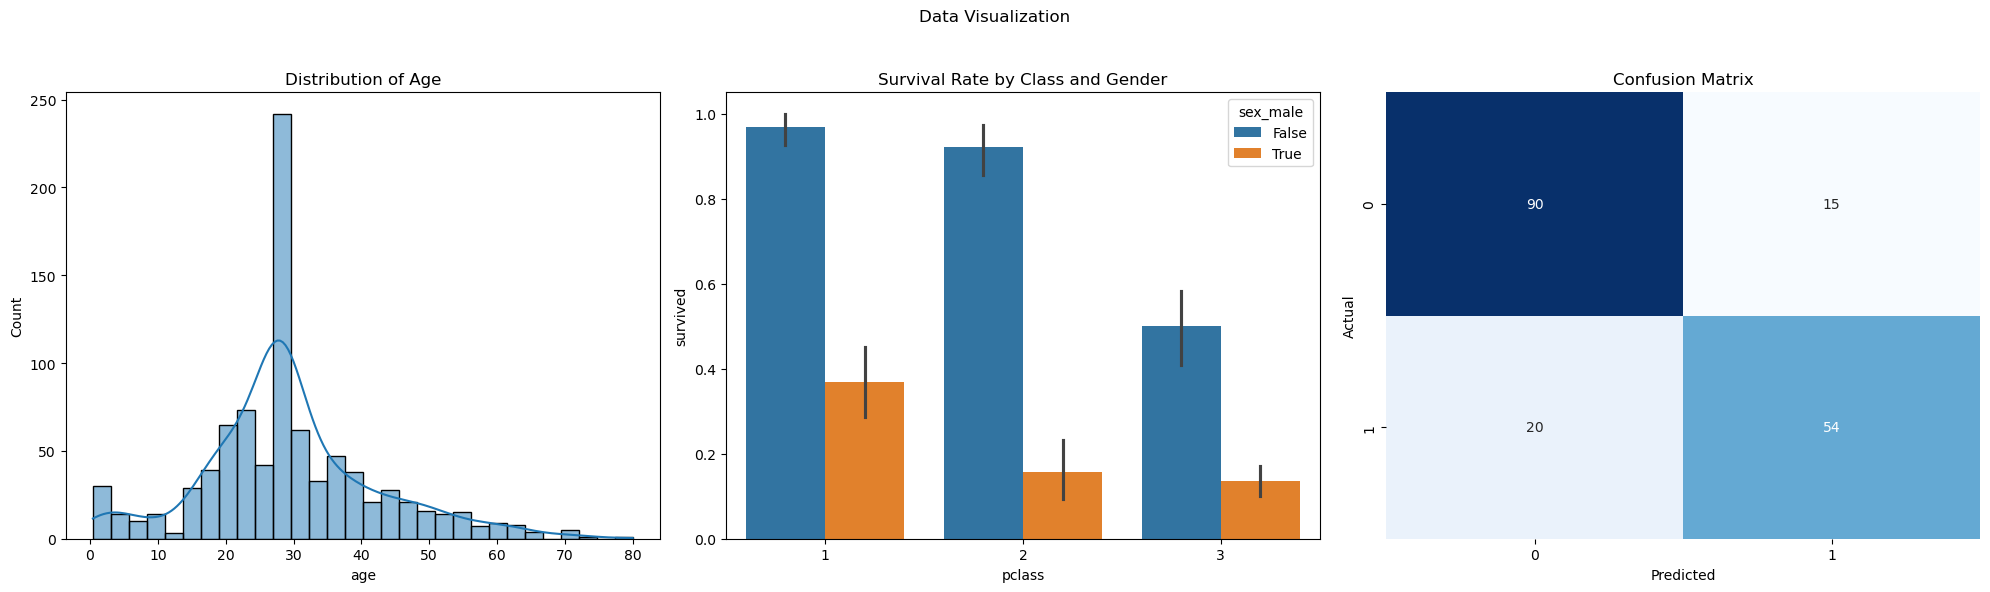

Data Visualization Completed.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("\nStarting Data Visualization...")

# Set up subplots with a 1x3 layout
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Data Visualization')

# Distribution of age
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

# Survival by Class and Gender
sns.barplot(data=df, x='pclass', y='survived', hue='sex_male', ax=axes[1])
axes[1].set_title('Survival Rate by Class and Gender')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[2])
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")
axes[2].set_title("Confusion Matrix")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()

print("Data Visualization Completed.")
